In [1]:
import networkx as nx
import cenpy
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily

In [2]:
ct = ["Connecticut, USA"]
ct_NewH = ['New Haven County, Connecticut, USA']
ct_Mids = ['Middlesex County, Connecticut, USA']
ct_Tola = ['Tolland County, Connecticut, USA']
ct_Hart = ['Hartford County, Connecticut, USA']
ct_Fair = ['Fairfield County, Connecticut, USA']
          #{'city':'Los Altos Hills', 'state':'California'},
          #'Loyola, California']
        
lyme = ['Lyme, Connecticut, USA']
Oldlyme = ['Old Lyme, Connecticut, USA']
Colchester = ['Colchester, Connecticut, USA']
NewMilford = ['New Milford, Connecticut, USA']
Bridgewater = ['Bridgewater, Connecticut, USA']
        
desired_building_types = ['school', 'commercial', 'retail','office','garage','hotel','church','train_station','dormitory',
                          'mosque','warehouse','stadium','clubhouse','chapel','fire_station','university','kindergarten',
                         'service','construction','hospital','plant_nursery','greenhouse','public','government','farm_auxiliary',
                         'farm','boathouse','sports_centre','dome','hangar','kiosk','college','napa auto parts','cathedral',
                         'synagogue','library','museum','convent','store','yes;commercial','university;yes','supermarket','parish_hall',
                          'motel','roof;commercial']

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17936\3387604212.py:7: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(ct_counties, tags={'building': desired_building_types})


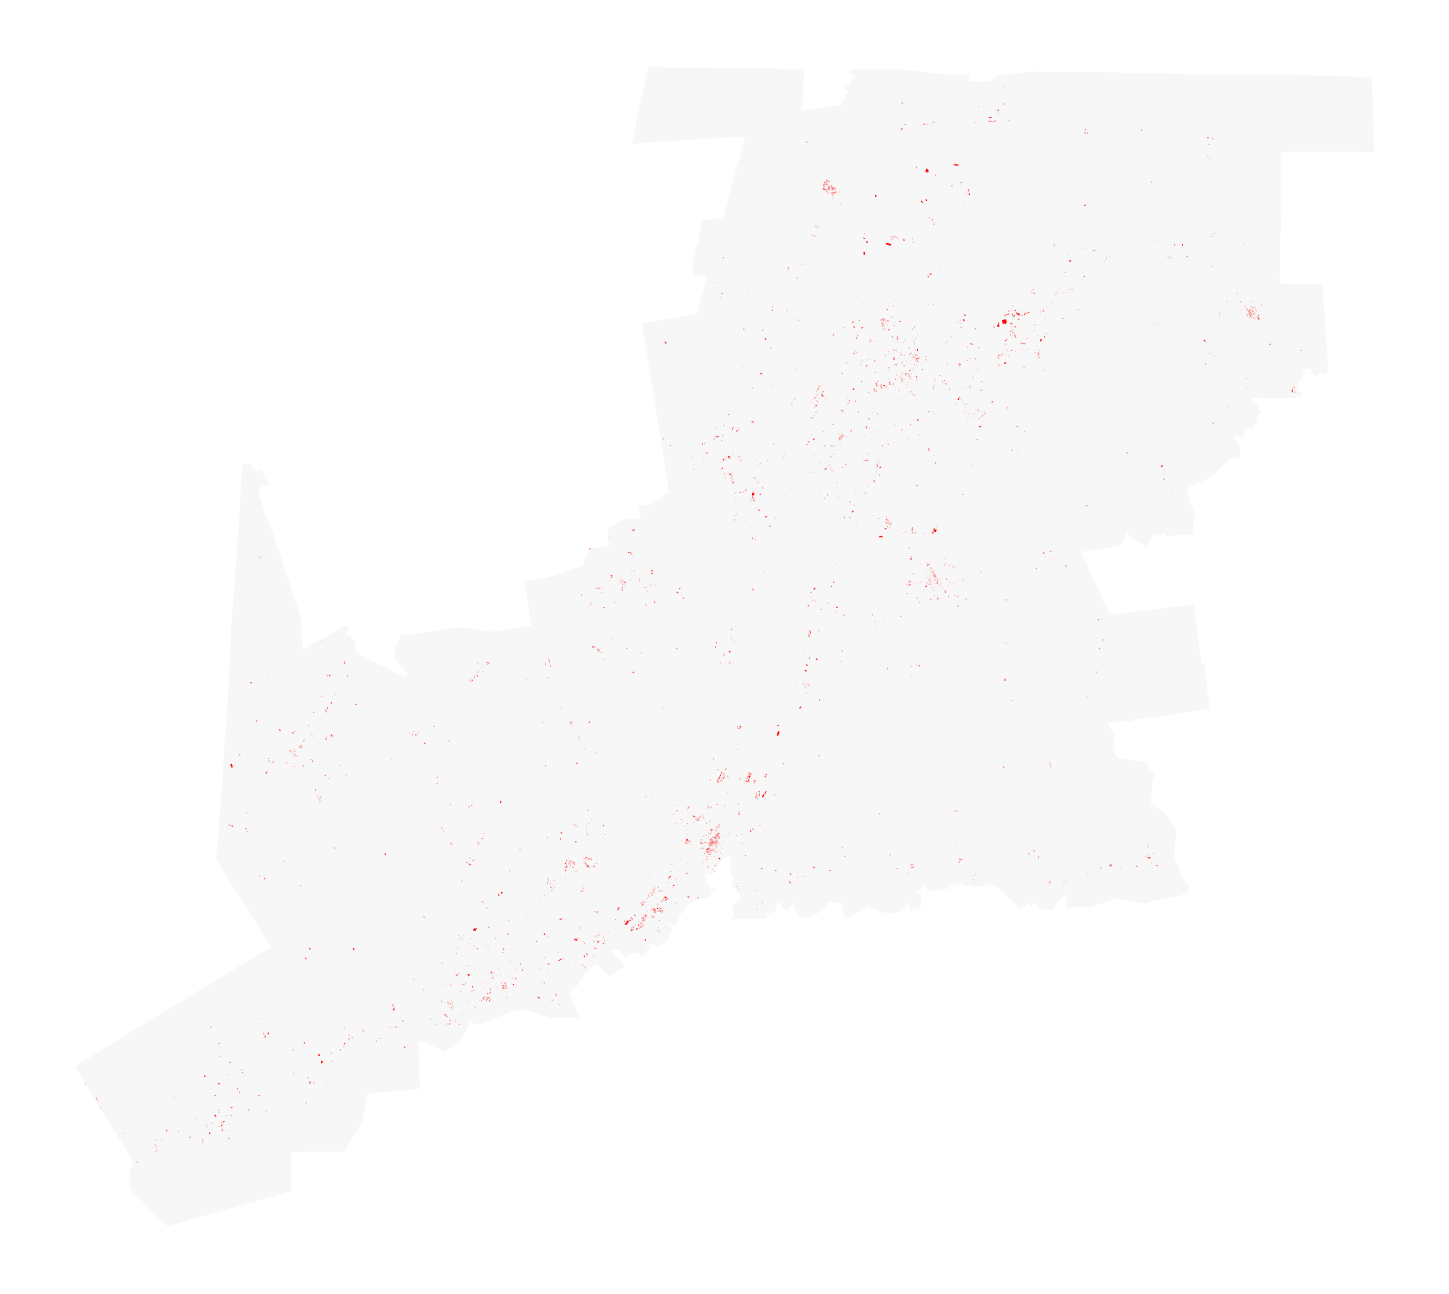

In [3]:
ct_counties = ['New Haven County, Connecticut, USA', 'Middlesex County, Connecticut, USA', 'Tolland County, Connecticut, USA', 
              'Hartford County, Connecticut, USA', 'Fairfield County, Connecticut, USA']
          #{'city':'Los Altos Hills', 'state':'California'},
          #'Loyola, California']
graph = ox.graph_from_place(ct_counties, network_type='drive')
area = ox.geocode_to_gdf(ct_counties)
bldgs = ox.geometries_from_place(ct_counties, tags={'building': desired_building_types})

fig, ax = plt.subplots(figsize=(15,15))
area.plot(ax=ax, facecolor='0.9',alpha=.3)#, edgecolor='k')
blgds_no_nodes = bldgs.iloc[bldgs.index.get_level_values('element_type')!='node']['geometry']
blgds_no_nodes.plot(ax=ax, facecolor='red', alpha=1)
plt.tight_layout()
ax.axis('off')

plt.savefig('../../../figures/footprint-msa.png', dpi=600,bbox_inches='tight')

In [4]:
def building_type_count(place_name, building_types):
    graph = ox.graph_from_place(place_name, network_type='all')
    area = ox.geocode_to_gdf(place_name)
    bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})

    # Use the correct variable name (bldgs) instead of bldgs_NewH
    unique_building_types = bldgs['building'].unique()

    # Use the correct variable name (bldgs) instead of bldgs_NewH
    building_type_counts = bldgs['building'].value_counts()

    # Iterate over the building types and counts
    for building_type, count in building_type_counts.items():
        print(f"{building_type}: {count} buildings")
        
    return building_type_counts

NewH = building_type_count(ct_NewH, desired_building_types)
Mids = building_type_count(ct_Mids, desired_building_types)
Tola = building_type_count(ct_Tola, desired_building_types)
Hart = building_type_count(ct_Hart, desired_building_types)
Fair = building_type_count(ct_Fair, desired_building_types)

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17936\1004931799.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})


commercial: 507 buildings
garage: 358 buildings
university: 313 buildings
retail: 223 buildings
school: 208 buildings
church: 131 buildings
greenhouse: 126 buildings
service: 27 buildings
office: 23 buildings
farm_auxiliary: 17 buildings
dormitory: 15 buildings
hospital: 13 buildings
train_station: 13 buildings
hangar: 12 buildings
stadium: 11 buildings
warehouse: 10 buildings
hotel: 10 buildings
public: 9 buildings
college: 7 buildings
government: 6 buildings
kindergarten: 5 buildings
motel: 5 buildings
chapel: 3 buildings
library: 2 buildings
farm: 2 buildings
synagogue: 2 buildings
construction: 2 buildings
parish_hall: 1 buildings
sports_centre: 1 buildings
supermarket: 1 buildings
yes;commercial: 1 buildings
university;yes: 1 buildings


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17936\1004931799.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})


garage: 839 buildings
commercial: 180 buildings
retail: 95 buildings
university: 53 buildings
greenhouse: 50 buildings
school: 45 buildings
farm_auxiliary: 41 buildings
office: 37 buildings
church: 29 buildings
college: 21 buildings
hospital: 21 buildings
service: 17 buildings
hangar: 5 buildings
hotel: 5 buildings
warehouse: 4 buildings
train_station: 4 buildings
dormitory: 3 buildings
farm: 2 buildings
construction: 2 buildings
government: 2 buildings
chapel: 2 buildings
boathouse: 2 buildings
stadium: 1 buildings
fire_station: 1 buildings
sports_centre: 1 buildings
kiosk: 1 buildings
convent: 1 buildings
synagogue: 1 buildings
roof;commercial: 1 buildings


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17936\1004931799.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})


retail: 102 buildings
garage: 83 buildings
university: 74 buildings
dormitory: 52 buildings
school: 38 buildings
commercial: 30 buildings
church: 26 buildings
greenhouse: 21 buildings
public: 13 buildings
office: 10 buildings
farm_auxiliary: 9 buildings
government: 8 buildings
service: 6 buildings
hotel: 4 buildings
hospital: 2 buildings
kindergarten: 2 buildings
farm: 1 buildings
stadium: 1 buildings
chapel: 1 buildings
construction: 1 buildings


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17936\1004931799.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})


greenhouse: 461 buildings
retail: 402 buildings
garage: 374 buildings
commercial: 342 buildings
school: 282 buildings
church: 185 buildings
warehouse: 94 buildings
dormitory: 80 buildings
office: 76 buildings
university: 64 buildings
service: 58 buildings
hospital: 42 buildings
college: 32 buildings
hangar: 28 buildings
farm_auxiliary: 18 buildings
construction: 14 buildings
hotel: 12 buildings
stadium: 8 buildings
public: 6 buildings
kiosk: 5 buildings
kindergarten: 5 buildings
fire_station: 3 buildings
train_station: 2 buildings
sports_centre: 2 buildings
boathouse: 2 buildings
farm: 2 buildings
chapel: 1 buildings
napa auto parts: 1 buildings
museum: 1 buildings
store: 1 buildings
cathedral: 1 buildings


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17936\1004931799.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})


garage: 343 buildings
commercial: 299 buildings
school: 201 buildings
retail: 160 buildings
church: 80 buildings
office: 33 buildings
service: 27 buildings
hangar: 23 buildings
university: 22 buildings
train_station: 16 buildings
dormitory: 16 buildings
warehouse: 15 buildings
boathouse: 13 buildings
farm_auxiliary: 11 buildings
greenhouse: 11 buildings
hotel: 10 buildings
hospital: 6 buildings
kindergarten: 6 buildings
public: 5 buildings
construction: 3 buildings
chapel: 3 buildings
fire_station: 3 buildings
government: 2 buildings
college: 2 buildings
stadium: 2 buildings
mosque: 2 buildings
kiosk: 2 buildings
plant_nursery: 1 buildings
clubhouse: 1 buildings
farm: 1 buildings
dome: 1 buildings
sports_centre: 1 buildings


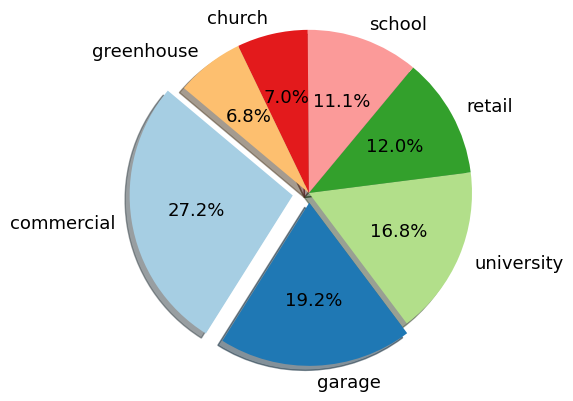

In [6]:
def plot_pie_chart(building_type_counts):
    labels = building_type_counts.index[:7]
    sizes = building_type_counts[labels].values

    # Choose a color palette
    colors = plt.cm.Paired(range(len(labels)))
       # Explode the first slice (optional)
    explode = (0.1, 0.06, 0, 0, 0, 0, 0)


    # Add shadow and set aspect ratio
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True,textprops={'fontsize': 13})
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plot_pie_chart(NewH)
plt.savefig('../../../figures/NewHaven-commercial-building.png', dpi=600,bbox_inches='tight')

In [6]:
hartford_msa = pd.concat([Tola, Mids, Hart], axis=1).sum(axis=1)
hartford_msa = hartford_msa.sort_values(ascending=False)

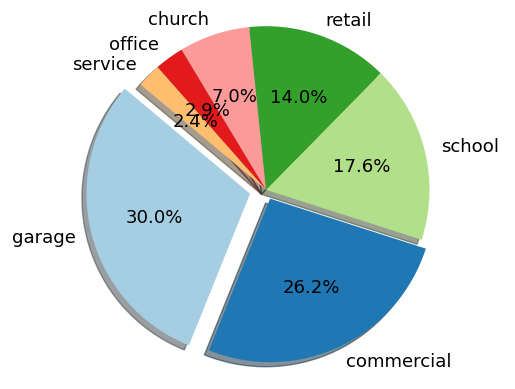

In [10]:
plot_pie_chart(Fair)
plt.savefig('../../../figures/Report-images/fairfield-commercial-building.png', dpi=600,bbox_inches='tight')

In [14]:
def plot_bar_chart(building_type_counts, color):
    # Determine the maximum value among all datasets


    plt.figure(figsize=(5, 4))
    building_type_counts.iloc[:7].plot(kind='bar', color=color, width=0.8)

    # Set the same y-axis limits for all plots
    plt.ylim(0, 1400)  # You can adjust the additional value as needed for spacing

    plt.ylabel('Number of Buildings', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.tight_layout()
    #plt.show()

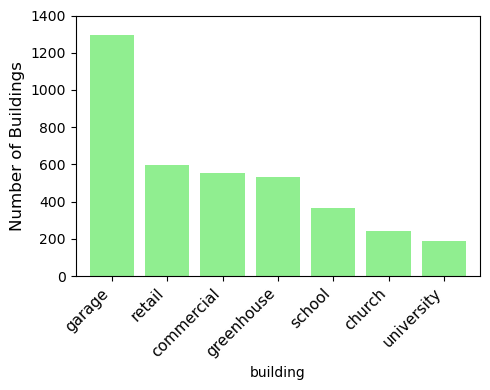

In [15]:
plot_bar_chart(hartford_msa,'lightgreen')
plt.savefig('../../../figures/Report-images/Hartford-commercial-building-number.png', dpi=600,bbox_inches='tight')

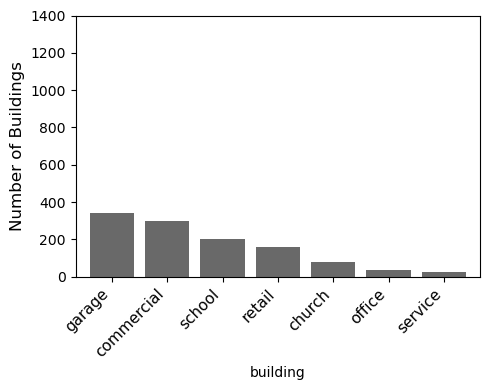

In [16]:
plot_bar_chart(Fair,'dimgray')
plt.savefig('../../../figures/Report-images/fairfield-commercial-building-number.png', dpi=600,bbox_inches='tight')

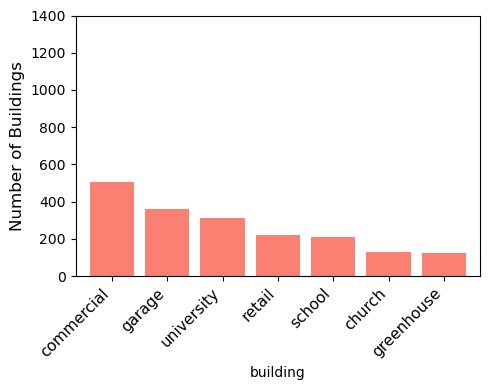

In [17]:
plot_bar_chart(NewH,'salmon')
plt.savefig('../../../figures/Report-images/HewHaven-commercial-building-number.png', dpi=600,bbox_inches='tight')

In [18]:
def footprint_graph(place_name, building_types):
    graph = ox.graph_from_place(place_name, network_type='all')
    area = ox.geocode_to_gdf(place_name)
    bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})

    fig, ax = plt.subplots(figsize=(5,5))
    area.plot(ax=ax, facecolor='0.9',alpha=.3)#, edgecolor='k')
    bldgs_no_nodes = bldgs.iloc[bldgs.index.get_level_values('element_type')!='node']['geometry']
    bldgs_no_nodes.plot(ax=ax, facecolor='red', alpha=1)
    plt.tight_layout()
    ax.axis('off')

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17936\2423382039.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})


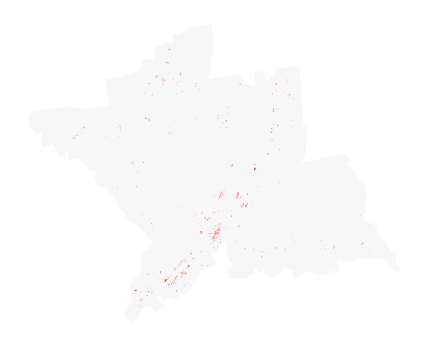

In [19]:
footprint_graph(ct_NewH, desired_building_types)
plt.savefig('../../../figures/Report-images/footprint-NewH.png', bbox_inches='tight')

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_19636\2423382039.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})


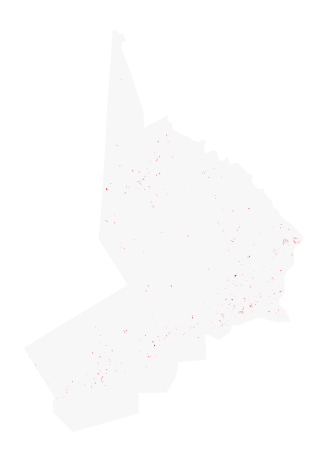

In [29]:
footprint_graph(ct_Fair, desired_building_types)
plt.savefig('../../../figures/Report-images/footprint-Fair.png', bbox_inches='tight')

In [20]:
def footprint_squarefeet(place_name, building_types):
    graph = ox.graph_from_place(place_name, network_type='all')
    area = ox.geocode_to_gdf(place_name)
    bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})

    building_geometries_series = gpd.GeoSeries(bldgs.geometry)
    total_footprint_area = building_geometries_series.area.sum()
    projected_crs = 'EPSG:6433'
    building_geometries_projected = bldgs.to_crs(projected_crs)
    total_footprint_area_projected = building_geometries_projected.area.sum()
    
    #print("Total Building Footprint Area:", total_footprint_area)
    #print("Total Building Footprint Area (Projected):", total_footprint_area_projected) #square feet
    return total_footprint_area_projected

In [21]:
#ct = footprint_squarefeet(ct, desired_building_types)
ct = footprint_squarefeet(ct, desired_building_types)
NewH = footprint_squarefeet(ct_NewH, desired_building_types)
Mids = footprint_squarefeet(ct_Mids, desired_building_types)
Tola = footprint_squarefeet(ct_Tola, desired_building_types)
Hart = footprint_squarefeet(ct_Hart, desired_building_types)+footprint_squarefeet(lyme, desired_building_types)+footprint_squarefeet(Oldlyme, desired_building_types)+footprint_squarefeet(Colchester, desired_building_types)
Fair = footprint_squarefeet(ct_Fair, desired_building_types)+footprint_squarefeet(NewMilford, desired_building_types)+footprint_squarefeet(Bridgewater, desired_building_types)

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17936\4126494917.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17936\4126494917.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  total_footprint_area = building_geometries_series.area.sum()
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17936\4126494917.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and funct

In [22]:
footprint = pd.DataFrame({
        'County': ['New Haven','Hartford','Middlesex','Tolland','Fairfield'],
        'Total Footprint Area (Projected)': [NewH,Hart,Mids,Tola,Fair]
    })

In [23]:
footprint 

,County,Total Footprint Area (Projected)
0,New Haven,4.021517e+06
1,Hartford,4.904064e+06
2,Middlesex,1.139099e+06
3,Tolland,6.902327e+05
4,Fairfield,3.061254e+06


In [31]:
ct = ["Connecticut, USA"]
ct = footprint_squarefeet(ct, desired_building_types)

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17936\4126494917.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_17936\4126494917.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  total_footprint_area = building_geometries_series.area.sum()


In [26]:
footprint = pd.DataFrame({
        'County': ['New Haven','Hartford','Middlesex','Tolland','Fairfield','Statewide'],
        'Total Footprint Area (square feet)': [NewH,Hart,Mids,Tola,Fair,ct]
    })

In [30]:
footprint['Ratio'] = footprint['Total Footprint Area (square feet)']/ct
footprint

,County,Total Footprint Area (square feet),Ratio
0,New Haven,4.021517e+06,0.249936
1,Hartford,4.904064e+06,0.304786
2,Middlesex,1.139099e+06,0.070795
3,Tolland,6.902327e+05,0.042898
4,Fairfield,3.061254e+06,0.190256
5,Statewide,1.609018e+07,1.000000


In [32]:
ct_emissions = pd.read_excel('../../../data/raw/Public GHG data 1990-2021.xlsx', sheet_name="Emission Totals")

In [34]:
emi = 3.82
footprint['GHG Emissions/MMTCO2e'] = footprint['Ratio']*emi

# Choose the rows you want to sum
rows_to_sum = [1, 2, 3]

# Calculate the sum of the selected rows
sum_result = footprint.iloc[rows_to_sum].sum()
sum_result

County                                HartfordMiddlesexTolland
Total Footprint Area (square feet)              6733395.210624
Ratio                                                 0.418479
GHG Emissions/MMTCO2e                                 1.598588
dtype: object

In [37]:
newH_footprint = footprint.iloc[0]
Fair_footprint = footprint.iloc[4]
state_footprint = footprint.iloc[5]

# Choose two rows by label (index)
rows_to_extract = [0, 4,5]

# Extract the selected rows into a new DataFrame
footprint_msa = footprint.loc[rows_to_extract].copy()

position_to_add = 2

# Concatenate the DataFrame before and after the new row
footprint_msa = pd.concat([footprint_msa.iloc[:position_to_add], pd.DataFrame([sum_result]), footprint_msa.iloc[position_to_add:]]).reset_index(drop=True)

In [39]:
footprint_msa.loc[0, 'County'] = 'New Haven-Milford'
footprint_msa.loc[1, 'County'] = 'Bridgeport-Stamford-Norwalk'
footprint_msa.loc[2, 'County'] = 'Hartford-East Hartford-Middletown'
footprint_msa

,County,Total Footprint Area (square feet),Ratio,GHG Emissions/MMTCO2e
0,New Haven-Milford,4.021517e+06,0.249936,0.954756
1,Bridgeport-Stamford-Norwalk,3.061254e+06,0.190256,0.726778
2,Hartford-East Hartford-Middletown,6.733395e+06,0.418479,1.598588
3,Statewide,1.609018e+07,1.000000,3.820000


In [40]:
new_row = {
    'County': 'Rest of the state',
    'Total Footprint Area (square feet)': footprint_msa.iloc[3]['Total Footprint Area (square feet)'] - footprint_msa.iloc[:3]['Total Footprint Area (square feet)'].sum(),
    'Ratio': footprint_msa.iloc[3]['Ratio'] - footprint_msa.iloc[:3]['Ratio'].sum(),
    'GHG Emissions/MMTCO2e': footprint_msa.iloc[3]['GHG Emissions/MMTCO2e'] - footprint_msa.iloc[:3]['GHG Emissions/MMTCO2e'].sum()
}

footprint_msa = pd.concat([footprint_msa.iloc[:3], pd.DataFrame([new_row]), footprint_msa.iloc[3:]]).reset_index(drop=True)
footprint_msa 

,County,Total Footprint Area (square feet),Ratio,GHG Emissions/MMTCO2e
0,New Haven-Milford,4.021517e+06,0.249936,0.954756
1,Bridgeport-Stamford-Norwalk,3.061254e+06,0.190256,0.726778
2,Hartford-East Hartford-Middletown,6.733395e+06,0.418479,1.598588
3,Rest of the state,2.274012e+06,0.141329,0.539877
4,Statewide,1.609018e+07,1.000000,3.820000


In [43]:
msa = footprint_msa.iloc[0:3,0]
values = footprint_msa.iloc[0:3,-1]
Footprint_ratio = footprint_msa.iloc[0:4,2]
categories = footprint_msa.iloc[0:4,1]

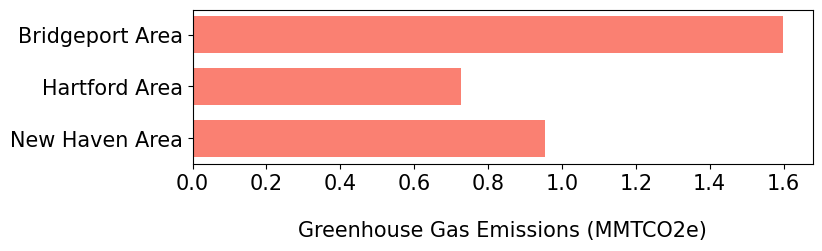

In [47]:
plt.figure(figsize=(8, 2))
X = ['New Haven Area', 'Hartford Area', 'Bridgeport Area']
values = [values[0],values[2],values[1]]

plt.barh(X, values, 0.7, color="salmon")
plt.xlabel("Greenhouse Gas Emissions (MMTCO2e)",fontsize=15, labelpad=20)
plt.xticks(fontsize=15)  # Adjust the font size as needed
plt.yticks(fontsize=15)

plt.savefig('../../../figures/Report-images/commercial-emissions.png', dpi=600,bbox_inches='tight')